<a href="https://colab.research.google.com/github/RabiatS/titanic_survivers_ml/blob/main/Titanic_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! chmod 600 kaggle.json && (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle) && cp kaggle.json ~/.kaggle/ && echo 'Done'
! kaggle competitions download -c titanic
! mv ../notebooks/titanic.zip ../data/
! ls

Done
  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 38.9MB/s]
mv: cannot stat '../notebooks/titanic.zip': No such file or directory
kaggle.json  sample_data  titanic.zip


In [3]:
# Dependencies
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
trainset = pd.read_csv("train.csv")
testset = pd.read_csv("test.csv")
genderset = pd.read_csv("gender_submission.csv")
display(trainset.head(), testset.head(), genderset.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


EDA


In [11]:
trainset.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
711,712,0,1,"Klaber, Mr. Herman",male,NaN,0,0,113028,26.5500,C124,S
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.6500,E67,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
163,164,0,3,"Calic, Mr. Jovo",male,17.0,0,0,315093,8.6625,NaN,S
218,219,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C
710,711,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24.0,0,0,PC 17482,49.5042,C90,C
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,347077,31.3875,NaN,S
411,412,0,3,"Hart, Mr. Henry",male,NaN,0,0,394140,6.8583,NaN,Q
419,420,0,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0000,NaN,S


In [12]:
trainset.set_index("PassengerId")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [13]:
trainset.isna().sum()           # There are null values in Age, Cabin, and Embarked

trainset[trainset["Cabin"].isna()]
trainset[trainset["Age"].isna()]
trainset[trainset["Embarked"].isna()] # Only two didn't embark

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [15]:
trainset[trainset["Cabin"].isna()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [16]:

trainset[trainset["Age"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [17]:
"""
Looking at all the unique cabins, we have over 600 unknown cabin data, could they be corrolated to any other features?

A & T: Boat Deck
B: Prominade
C: Bridge
D: Shelter Deck
E: Saloon Deck
F: Middle Deck
G: Orlop Deck Tank top

"""
trainset["Cabin"].unique() # all the cabin numbers in our dataset

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [18]:
'''
    Here we are examining the data to see if there's a relationship between class, fare, and cabin.
    Most passengers from 1st class are cabin B or C, but there are some other cabins in the group.
    Since the relationship cannot be fully determined, we will replace the NaN cabin values with Unknown
'''
fare_df = trainset.sort_values(by='Fare', ascending= False)
fare_df.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.00,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.00,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.00,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.00,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.00,1,4,19950,263.0000,C23 C25 C27,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.00,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.00,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C


In [19]:
trainset['Cabin'] = trainset['Cabin'].fillna(value='Unknown')
trainset.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Unknown,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,Unknown,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,Unknown,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,Unknown,C


In [20]:
trainset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
'''
    Since the mean age does not change the initial distribution of the data, we will fill the NaN values of age with the mean.
'''
mean = trainset['Age'].mean()
trainset['Age'] = trainset['Age'].fillna(value=mean)
trainset['Age'] = trainset['Age'].astype(int)
trainset.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,Unknown,S
5,6,0,3,"Moran, Mr. James",male,29,0,0,330877,8.4583,Unknown,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,Unknown,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,Unknown,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,Unknown,C


In [22]:
'''
    Only two passengers have NaN in embarked, we will view the distribution.
'''
trainset = trainset.dropna(subset=['Embarked'])
trainset.isna().sum() # all NaN values should be dealt with

train_df = trainset.drop(columns= ["Name", "Ticket", "Cabin"])
train_df.sample(10)




[3, 1, 2]

In [ ]:
'''
    Encode the embark location.
    C = Cherbourg --> 1
    Q = Queenstown --> 2
    S = Southampton --> 3
'''
train_df.loc[train_df.Embarked == "C", "Embarked"] = 1   # 1 for Cherbourg
train_df.loc[train_df.Embarked =="Q", "Embarked"] = 2  # 2 for Queenstown
train_df.loc[train_df.Embarked =="S", "Embarked"] = 3  # 2 for Southampton

train_df.head(10)

train_df.loc[train_df.Sex == "female", "Sex"] = 1   # 1 for female
train_df.loc[train_df.Sex =="male", "Sex"] = 0  # 0 for male


train_df.head(10)

In [ ]:

'''
1st = Upper
2nd = Middle
3rd = Lower
'''
list((trainset["Pclass"]).unique())

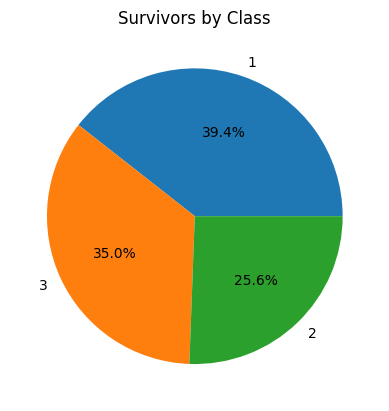

In [23]:
#How many people survived based on the class

survived = trainset[trainset['Survived'] == 1]
class_survived_counts = survived['Pclass'].value_counts()
labels = class_survived_counts.index

# Plot the pie chart
plt.pie(class_survived_counts, labels=labels, autopct="%1.1f%%")
plt.title("Survivors by Class")
plt.show()

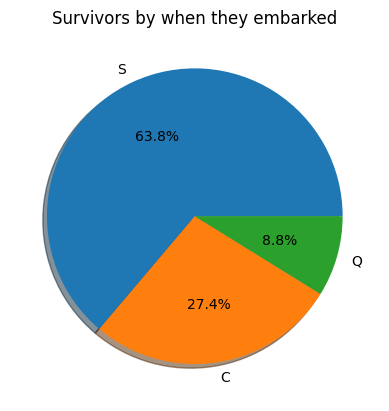

In [24]:
#How many people survived based on the Embarked location

survived = trainset[trainset['Survived'] == 1]
embarked_survived_counts = survived['Embarked'].value_counts()
labels = embarked_survived_counts.index

# Plot the pie chart
plt.pie(embarked_survived_counts, labels=labels, autopct="%1.1f%%", shadow ="True")
plt.title("Survivors by when they embarked")
plt.show()

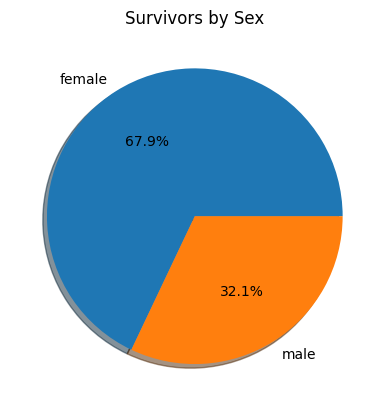

In [25]:
# based on sex
survived = trainset[trainset['Survived'] == 1]
sex_survived_counts = survived['Sex'].value_counts()
labels = sex_survived_counts.index

# Plot the pie chart
plt.pie(sex_survived_counts, labels=labels, autopct="%1.1f%%", shadow ="True")
plt.title("Survivors by Sex")
plt.show()

In [27]:
train_df.head(10)
train_df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005028,-0.035330,-0.043136,0.030842,-0.057686,-0.001657,0.012703,0.013166
Survived,-0.005028,1.000000,-0.335549,0.541585,-0.072695,-0.034040,0.083151,0.255290,-0.169718
Pclass,-0.035330,-0.335549,1.000000,-0.127741,-0.331685,0.081656,0.016824,-0.548193,0.164681
Sex,-0.043136,0.541585,-0.127741,1.000000,-0.087839,0.116348,0.247508,0.179958,-0.110320
Age,0.030842,-0.072695,-0.331685,-0.087839,1.000000,-0.231992,-0.175770,0.090885,-0.025105
SibSp,-0.057686,-0.034040,0.081656,0.116348,-0.231992,1.000000,0.414542,0.160887,0.068900
Parch,-0.001657,0.083151,0.016824,0.247508,-0.175770,0.414542,1.000000,0.217532,0.040449
Fare,0.012703,0.255290,-0.548193,0.179958,0.090885,0.160887,0.217532,1.000000,-0.226311
Embarked,0.013166,-0.169718,0.164681,-0.110320,-0.025105,0.068900,0.040449,-0.226311,1.000000


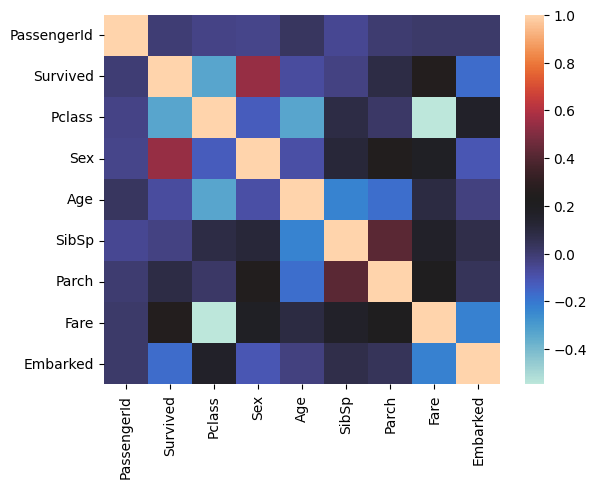

In [28]:
sns.heatmap(train_df.corr(), cmap= "icefire")
plt.show()

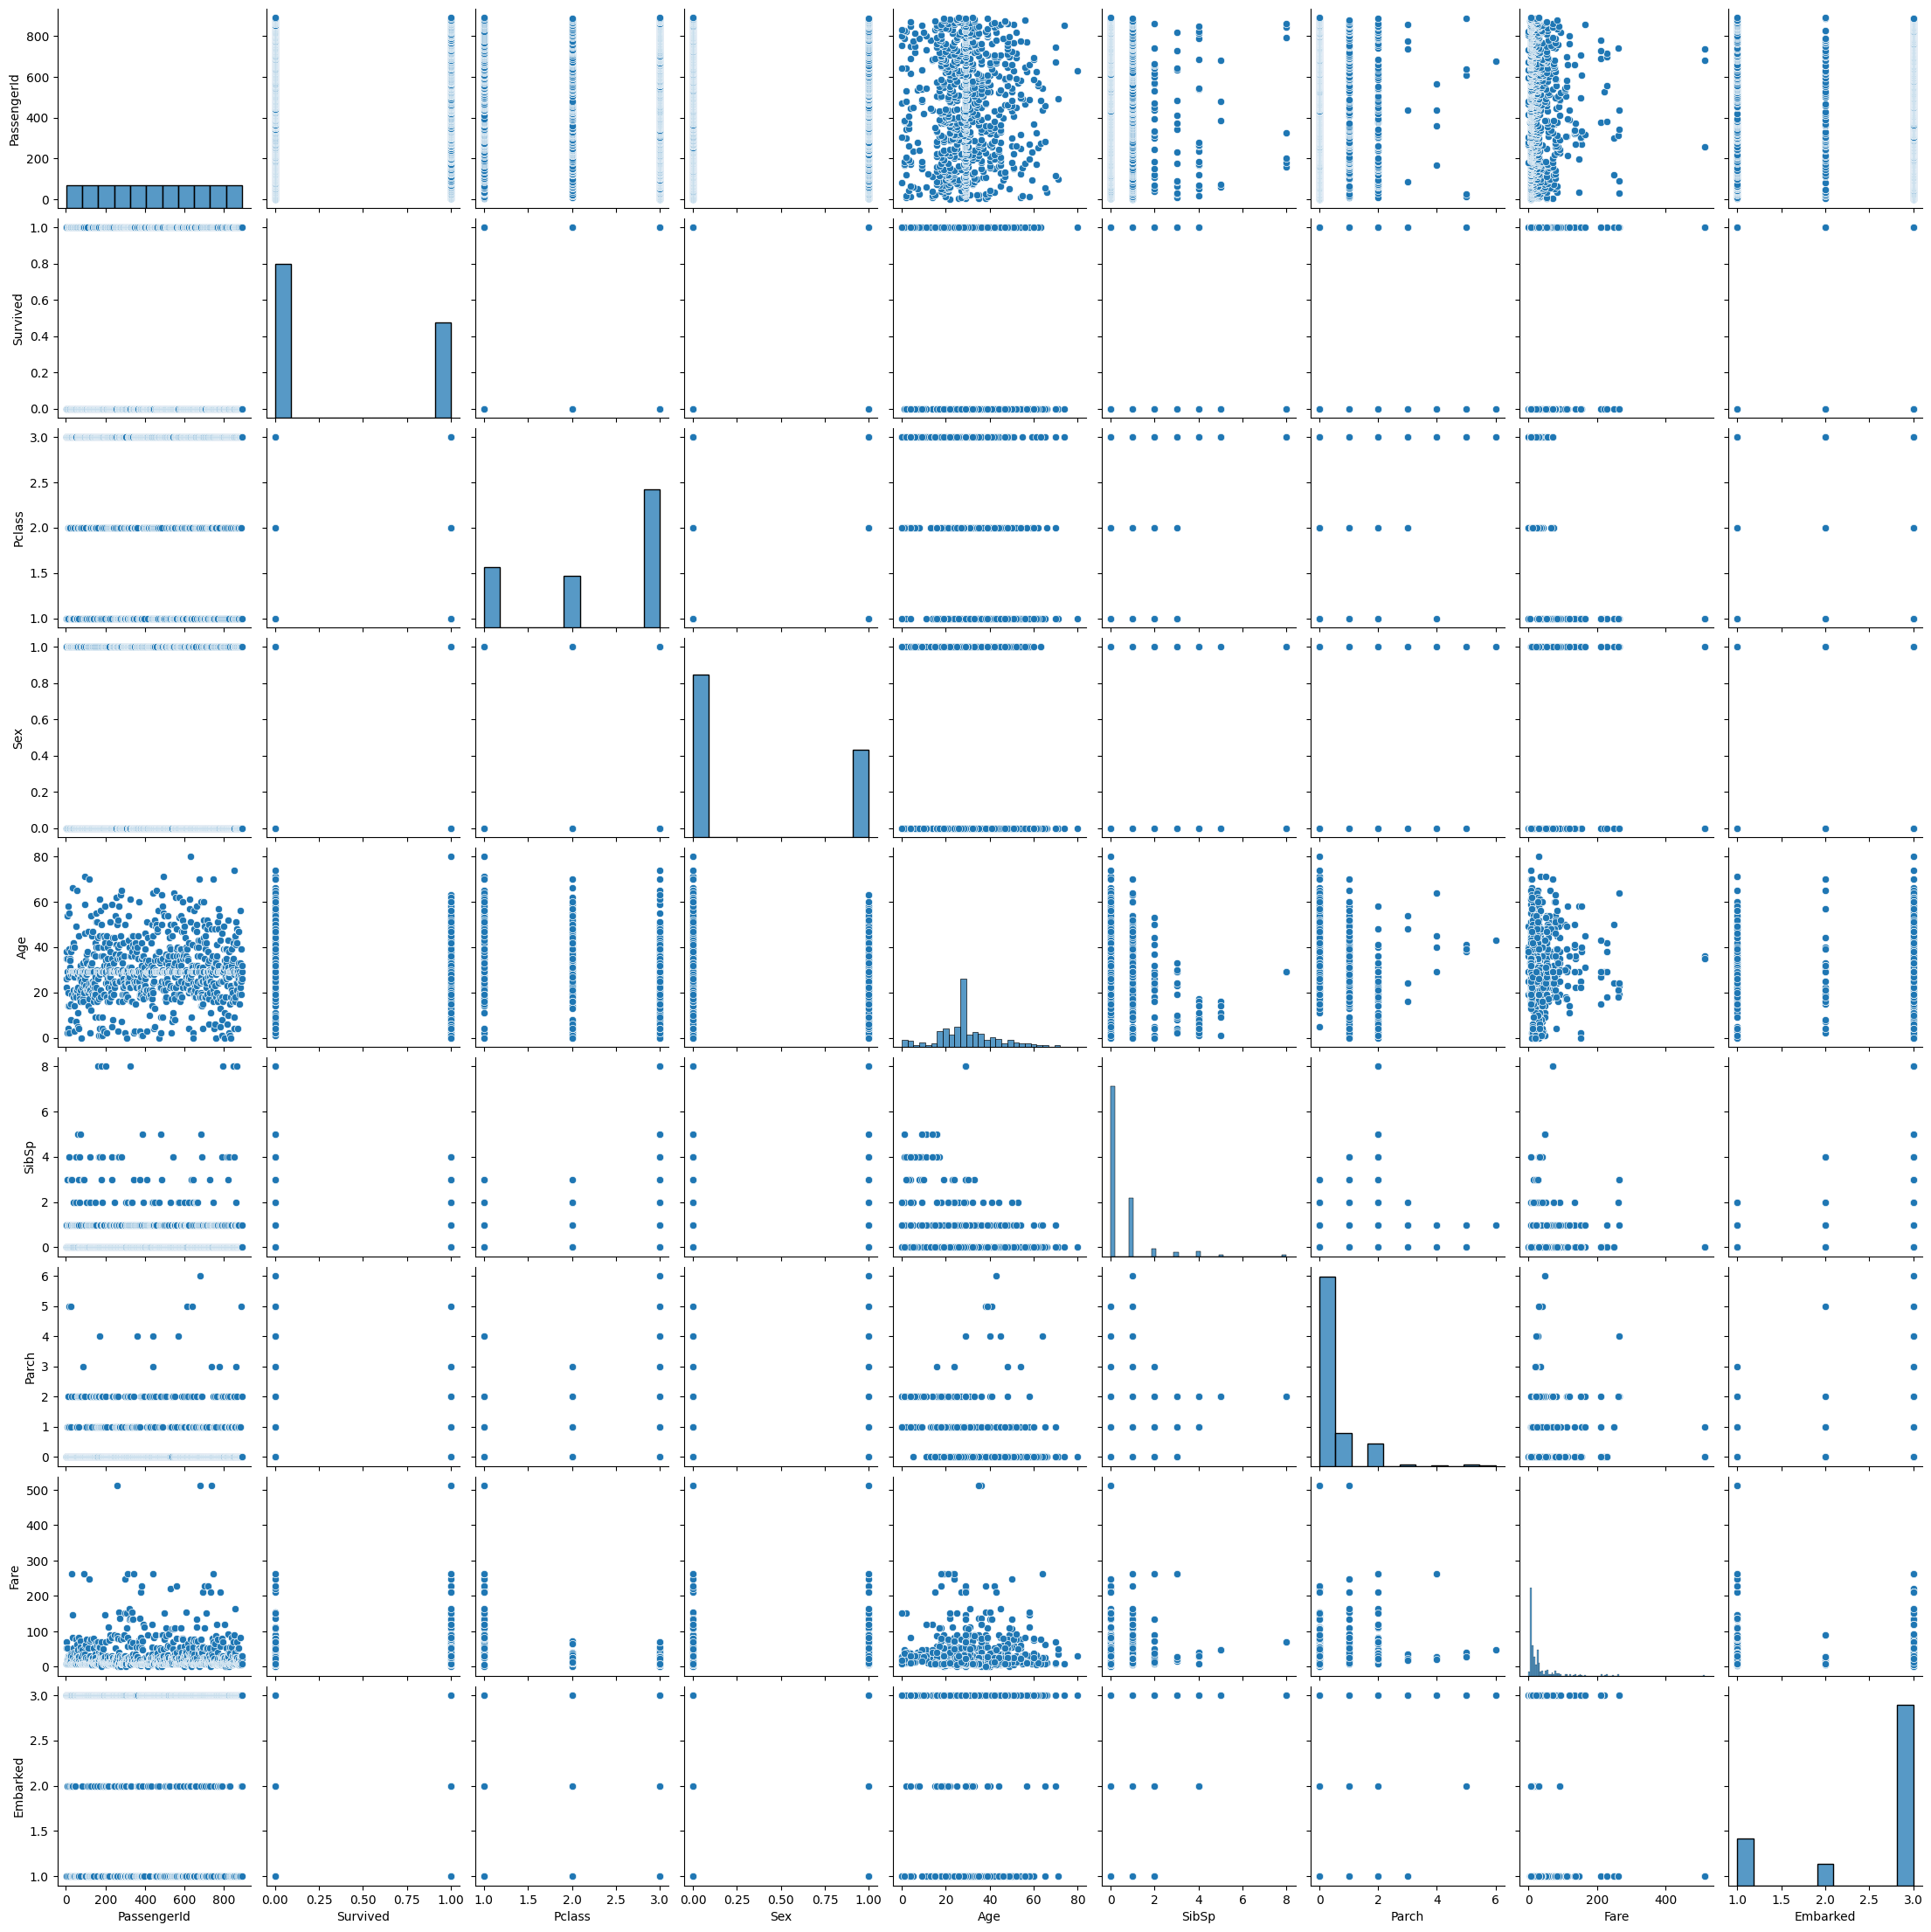

In [29]:
sns.pairplot(train_df)
plt.show()

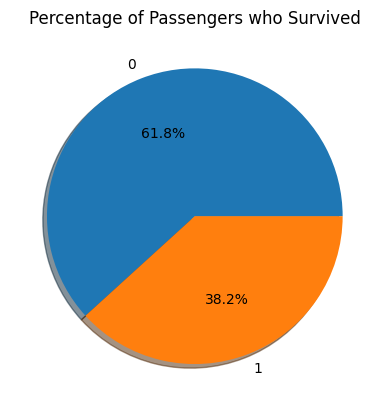

In [30]:
# Plot the pie chart
plt.pie(trainset['Survived'].value_counts(), labels=trainset['Survived'].unique(), autopct="%1.1f%%", shadow ="True")
plt.title("Percentage of Passengers who Survived")
plt.show()

In [ ]:
'''
    Checking to see if there are any duplicate columns
'''
duplicateRows = trainset[trainset.duplicated()]
duplicateRows    # Based on this result, we will not drop data

In [31]:
#cleaning test data
testset.set_index("PassengerId")
fare_df = testset.sort_values(by='Fare', ascending= False)
fare_df.head(5)
testset['Cabin'] = testset['Cabin'].fillna(value='Unknown')
testset.head(2)
mean = testset['Age'].mean()
testset['Age'] = testset['Age'].fillna(value=mean)
testset['Age'] = testset['Age'].astype(int)
testset.head(2)
testset = testset.dropna(subset=['Embarked'])
testset.isna().sum() # all NaN values should be dealt with
test_df = testset.drop(columns= ["Name", "Ticket", "Cabin"])
testset.sample()
test_df.loc[test_df.Embarked == "C", "Embarked"] = 1   # 1 for Cherbourg
test_df.loc[test_df.Embarked =="Q", "Embarked"] = 2  # 2 for Queenstown
test_df.loc[test_df.Embarked =="S", "Embarked"] = 3  # 2 for Southampton

test_df.loc[test_df.Sex == "female", "Sex"] = 1   # 1 for female
test_df.loc[test_df.Sex =="male", "Sex"] = 0  # 0 for male

list((testset["Pclass"]).unique())


test_df["Fare"].isna().count() # 418 missing so we fill with the mean
mean = test_df['Fare'].mean()
test_df['Fare'] = test_df['Fare'].fillna(value= mean)
test_df.sample(50)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
105,997,3,0,28,0,0,22.5250,3
19,911,3,1,45,0,0,7.2250,1
273,1165,3,1,30,1,0,15.5000,2
396,1288,3,0,24,0,0,7.2500,2
202,1094,1,0,47,1,0,227.5250,1
108,1000,3,0,30,0,0,8.7125,3
350,1242,1,1,45,0,1,63.3583,1
28,920,1,0,41,0,0,30.5000,3
385,1277,2,1,24,1,2,65.0000,3
87,979,3,1,18,0,0,8.0500,3


The Model

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import resample

train_data = train_df.copy()

FEATURES = ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare', 'Embarked']
TARGET = 'Survived'

# Balancing dataset for equal frequency of datapoints for both classes
# balanced_df = train_data.groupby(TARGET).apply(lambda x: x.sample(train_data[TARGET].value_counts().min()))
# balanced_df

df_class0 = train_data[train_data['Survived'] == 0] # len = 549
df_class1 = train_data[train_data['Survived'] == 1] # len = 340

df_class0 = resample(df_class0, replace=False, n_samples=len(df_class1), random_state=13)
df_class1 = resample(df_class1, replace=False, n_samples=len(df_class1), random_state=13)

df_balanced = pd.concat([df_class0, df_class1])
df_balanced.sort_index().reset_index(drop=True)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22,1,0,7.2500,3
1,2,1,1,1,38,1,0,71.2833,1
2,3,1,3,1,26,0,0,7.9250,3
3,4,1,1,1,35,1,0,53.1000,3
4,6,0,3,0,29,0,0,8.4583,2
...,...,...,...,...,...,...,...,...,...
675,886,0,3,1,39,0,5,29.1250,2
676,887,0,2,0,27,0,0,13.0000,3
677,888,1,1,1,19,0,0,30.0000,3
678,890,1,1,0,26,0,0,30.0000,1


In [33]:
X_train, X_validate, y_train, y_validate = train_test_split(
    train_data[FEATURES],
    train_data[TARGET],
    test_size=0.2,
    random_state=13,
    shuffle=True,)
    # stratify=df_balanced[TARGET]) # Use stratify only after verifying that our data is balanced

display(X_train.head(), y_train.head())

X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

X_validate = X_validate.to_numpy()
y_validate = y_validate.to_numpy()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
700,701,1,1,18,1,0,227.5250,1
160,161,3,0,44,0,1,16.1000,3
508,509,3,0,28,0,0,22.5250,3
389,390,2,1,17,0,0,12.0000,1
299,300,1,1,50,0,1,247.5208,1


700    1
160    0
508    0
389    1
299    1
Name: Survived, dtype: int64

In [34]:
# For our binary classification problem, we use Logistic Regression and set a random state for reproducibility
# Change scaler after validating that data should be standarized/normalized in a specific maner (i.e. MinMaxScaler, MaxAbsScaler)

clf = make_pipeline(MinMaxScaler(),
                    GridSearchCV(LogisticRegression(),
                                 param_grid={'C': [0.01, 0.1, 1., 10., 100.]},
                                 cv=5,
                                 refit=True))

clf.fit(X_train, y_train)
y_pred = clf.predict(X_validate)

Performance Metrics

In [35]:
import torch
from torch.utils.data import Dataset
from sklearn.metrics import log_loss, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

class PerformanceMetrics(Dataset):
    def __init__(self, predict, test):
        self.predict = torch.from_numpy(predict).type(torch.float).numpy()
        self.test = torch.from_numpy(test).type(torch.float).numpy()

    def performancemetrics(self, predict, true):
        acc = round(accuracy_score(true, predict), 3)
        precision = round(precision_score(true, predict), 3)
        recall = round(recall_score(true, predict), 3)
        # r2score = round(r2_score(true, predict), 3)
        f1score = round(f1_score(true, predict), 3)

        log = round(log_loss(true, predict), 3) # cross entropy loss
        mse = round(mean_squared_error(true, predict), 3)
        mae = round(mean_absolute_error(true, predict), 3)

        fpr, tpr, thresholds = roc_curve(true, predict)
        auc = roc_auc_score(true, predict)

        cmatrix = confusion_matrix(true, predict).ravel()
        tn, fp, fn, tp = cmatrix

        cmatrix_df = pd.DataFrame(data=[tp, fp, tn, fn],
                                    index=['True Positive', 'False Positive', 'True Negative',
                                        'False Negative'],
                                    columns=['Confusion Matrix'])

        met_df = pd.DataFrame(data=[acc, precision, recall, f1score, log, mse, mae, fpr, tpr, auc],
                                    index=['Accuracy','Precision', 'Recall', 'F1 Score',
                                        'Log Loss', 'MSE Loss', 'MAE Loss', 'False Positive Rate',
                                        'True Positive Rate', 'Area Under the Curve'],
                                    columns=['Performance Metrics'])
        return met_df, cmatrix_df

functiontest = PerformanceMetrics(y_pred, y_validate)
metrics_df, cmatrix_df = functiontest.performancemetrics(functiontest.predict, functiontest.test)
print(metrics_df)
print(cmatrix_df)

                                  Performance Metrics
Accuracy                                        0.826
Precision                                       0.875
Recall                                          0.671
F1 Score                                         0.76
Log Loss                                        2.776
MSE Loss                                        0.174
MAE Loss                                        0.174
False Positive Rate   [0.0, 0.06666666666666667, 1.0]
True Positive Rate     [0.0, 0.6712328767123288, 1.0]
Area Under the Curve                         0.802283
                Confusion Matrix
True Positive                 49
False Positive                 7
True Negative                 98
False Negative                24


kaggle.json
Done
titanic.zip: Skipping, found more recently modified local copy (use --force to force download)
mv: cannot stat '../notebooks/titanic.zip': No such file or directory
gender_submission.csv  kaggle.json  output.csv	sample_data  test.csv  titanic.zip  train.csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


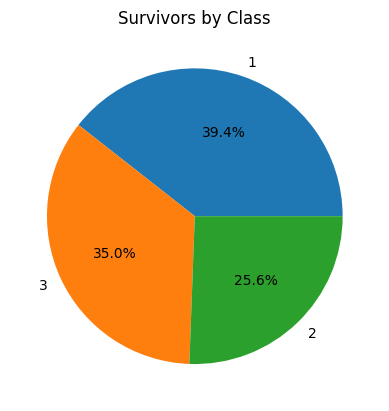

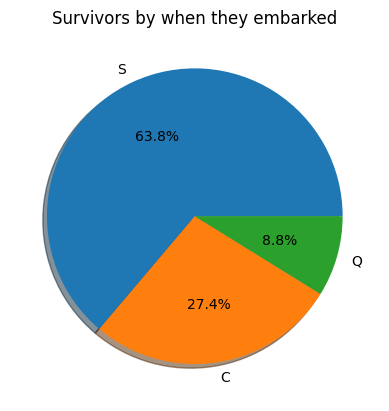

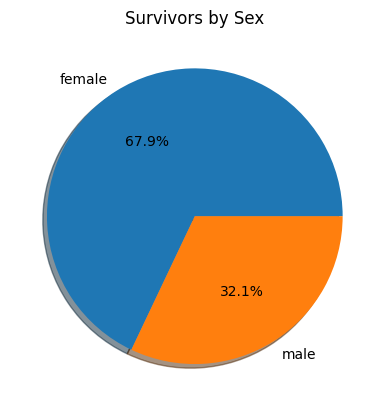

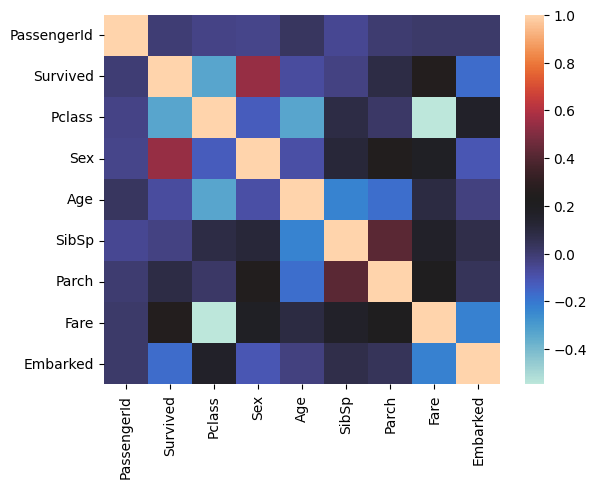

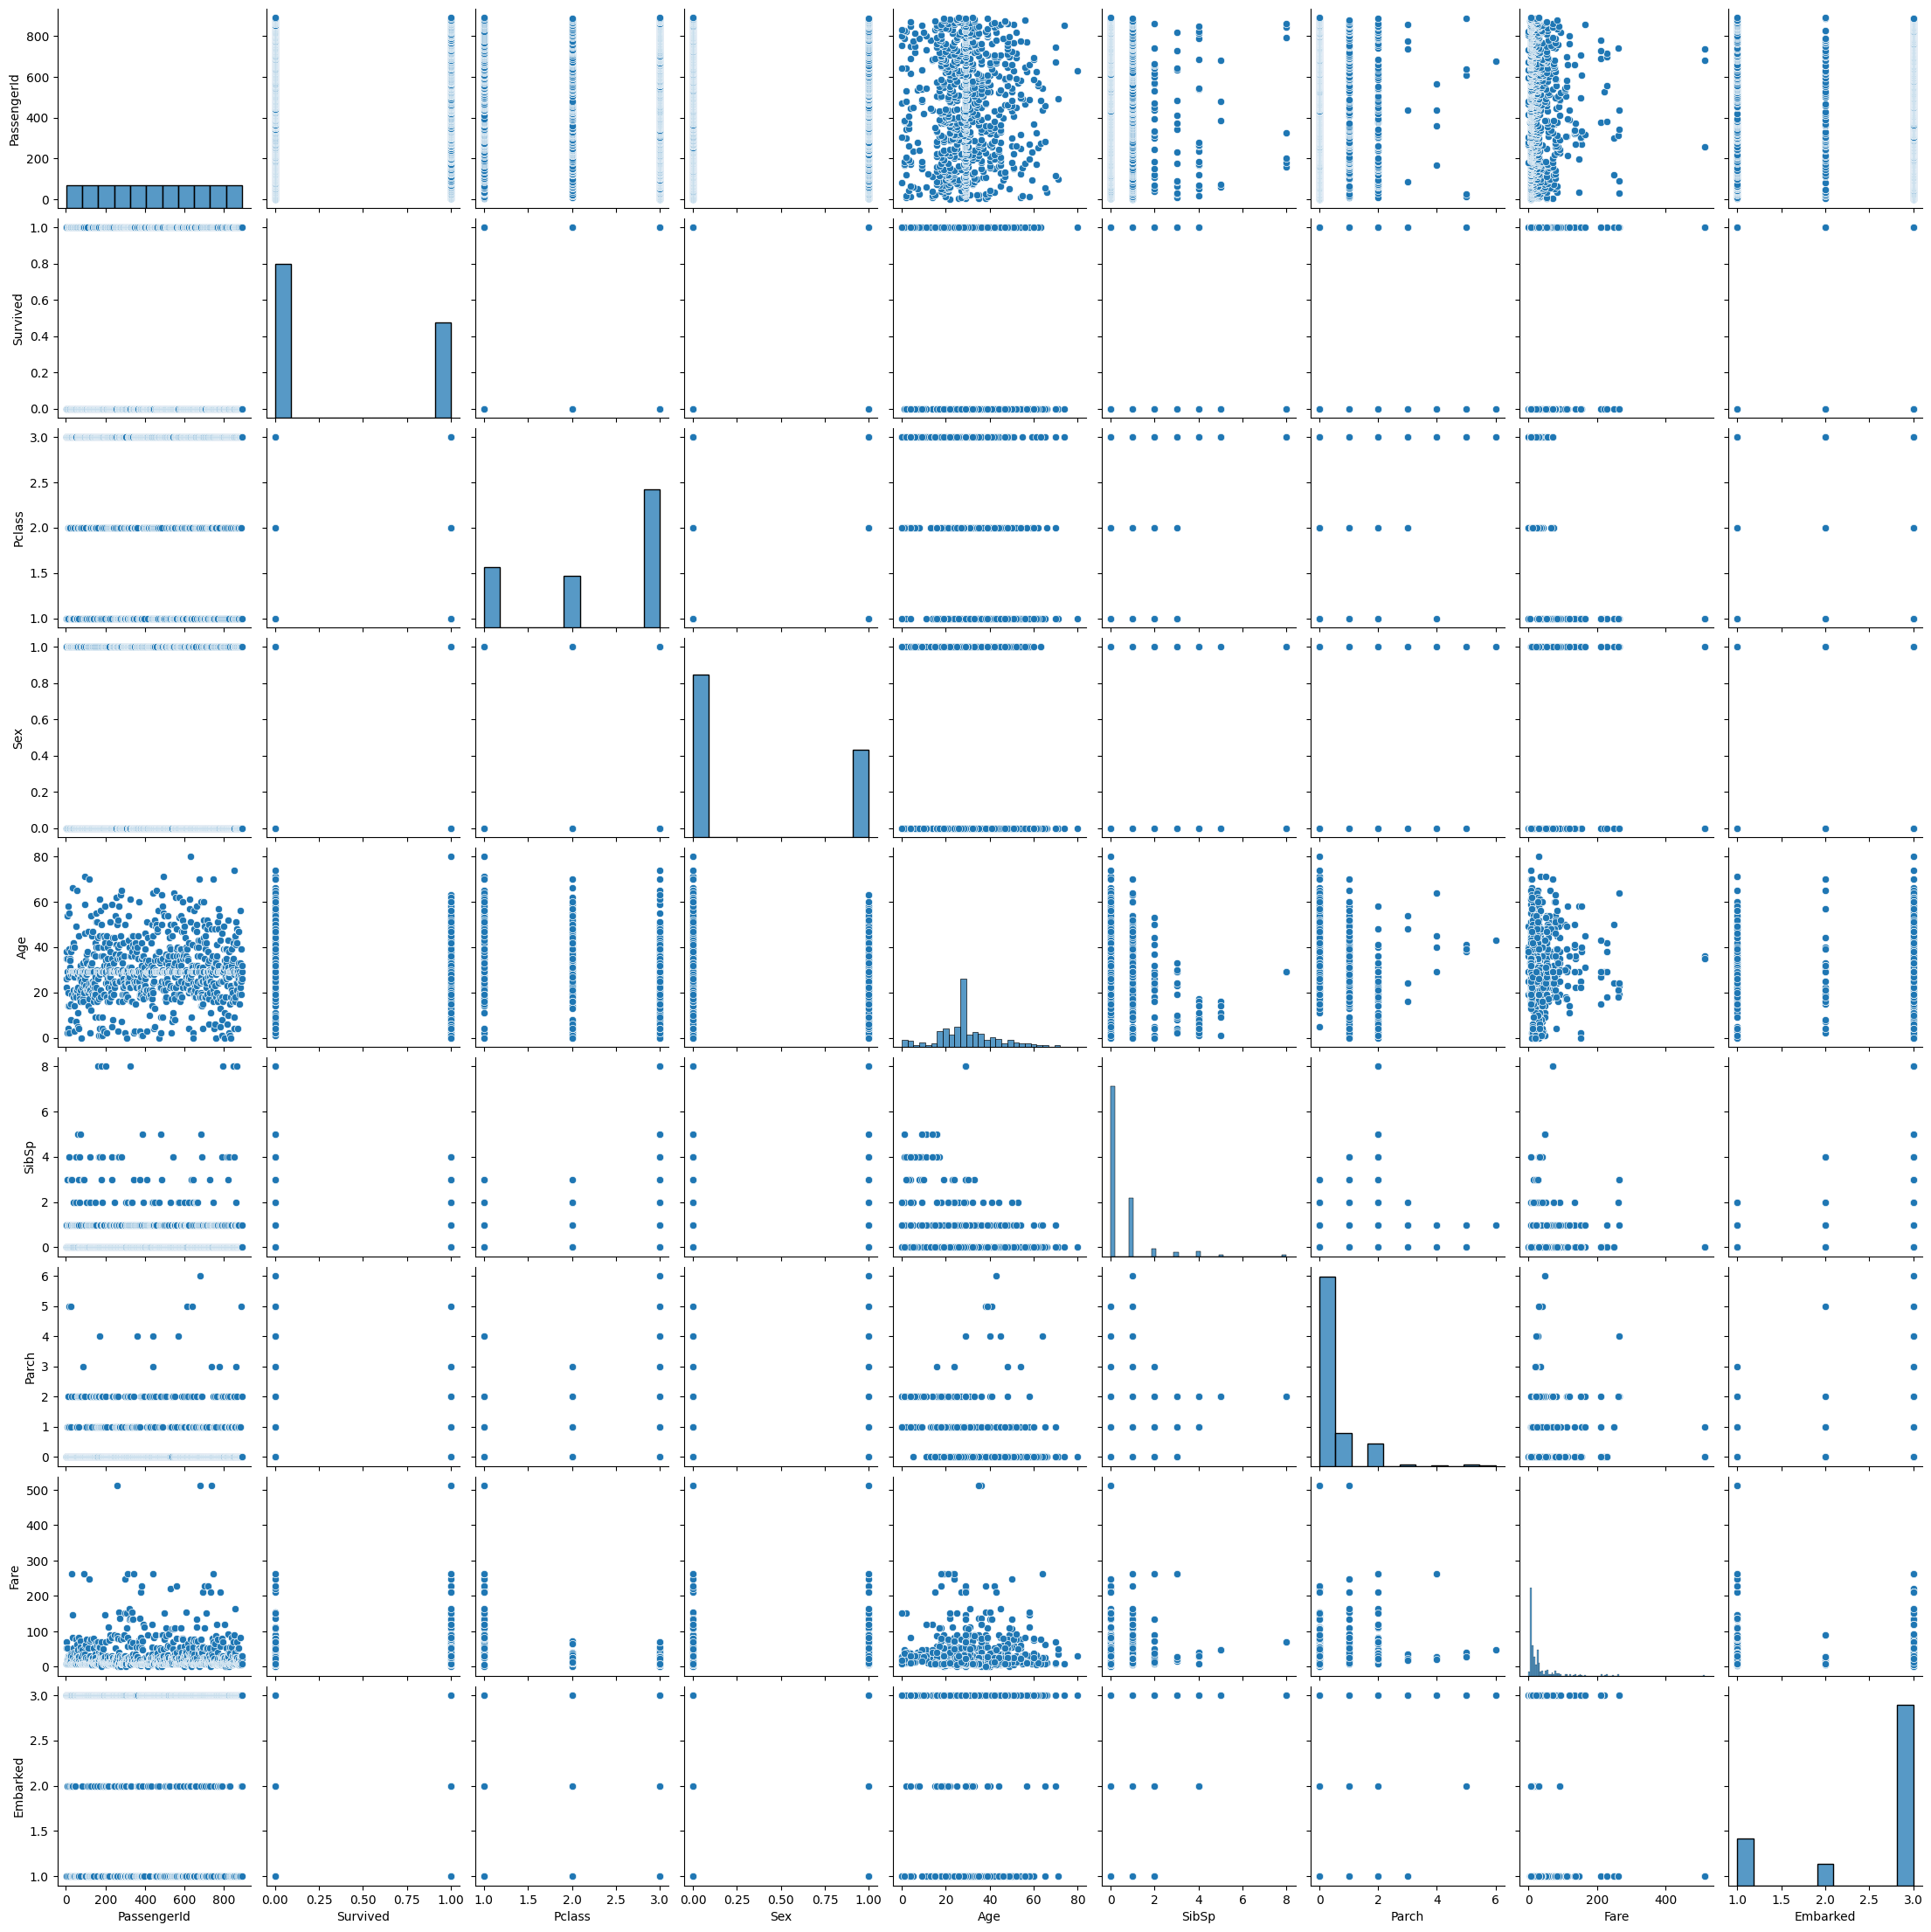

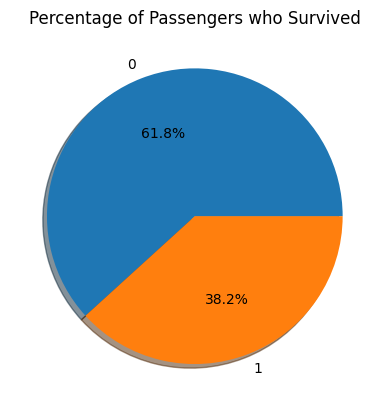

In [42]:
# prompt: create better classification model to identify chances of survivial

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import resample
import torch
from torch.utils.data import Dataset
from sklearn.metrics import log_loss, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
! chmod 600 kaggle.json && (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle) && cp kaggle.json ~/.kaggle/ && echo 'Done'
! kaggle competitions download -c titanic
! mv ../notebooks/titanic.zip ../data/
! ls
# Dependencies
trainset = pd.read_csv("train.csv")
testset = pd.read_csv("test.csv")
genderset = pd.read_csv("gender_submission.csv")
display(trainset.head(), testset.head(), genderset.head())
# EDA
#
trainset.sample(10)
trainset.set_index("PassengerId")
trainset.isna().sum()           # There are null values in Age, Cabin, and Embarked

trainset[trainset["Cabin"].isna()]
trainset[trainset["Age"].isna()]
trainset[trainset["Embarked"].isna()] # Only two didn't embark
trainset[trainset["Cabin"].isna()]


trainset[trainset["Age"].isna()]
"""
Looking at all the unique cabins, we have over 600 unknown cabin data, could they be corrolated to any other features?

A & T: Boat Deck
B: Prominade
C: Bridge
D: Shelter Deck
E: Saloon Deck
F: Middle Deck
G: Orlop Deck Tank top

"""
trainset["Cabin"].unique() # all the cabin numbers in our dataset
'''
    Here we are examining the data to see if there's a relationship between class, fare, and cabin.
    Most passengers from 1st class are cabin B or C, but there are some other cabins in the group.
    Since the relationship cannot be fully determined, we will replace the NaN cabin values with Unknown
'''
fare_df = trainset.sort_values(by='Fare', ascending= False)
fare_df.head(50)

trainset['Cabin'] = trainset['Cabin'].fillna(value='Unknown')
trainset.head(20)

trainset.describe()
'''
    Since the mean age does not change the initial distribution of the data, we will fill the NaN values of age with the mean.
'''
mean = trainset['Age'].mean()
trainset['Age'] = trainset['Age'].fillna(value=mean)
trainset['Age'] = trainset['Age'].astype(int)
trainset.head(20)
'''
    Only two passengers have NaN in embarked, we will view the distribution.
'''
trainset = trainset.dropna(subset=['Embarked'])
trainset.isna().sum() # all NaN values should be dealt with

train_df = trainset.drop(columns= ["Name", "Ticket", "Cabin"])
train_df.sample(10)



'''
    Encode the embark location.
    C = Cherbourg --> 1
    Q = Queenstown --> 2
    S = Southampton --> 3
'''
train_df.loc[train_df.Embarked == "C", "Embarked"] = 1   # 1 for Cherbourg
train_df.loc[train_df.Embarked =="Q", "Embarked"] = 2  # 2 for Queenstown
train_df.loc[train_df.Embarked =="S", "Embarked"] = 3  # 2 for Southampton

train_df.head(10)

train_df.loc[train_df.Sex == "female", "Sex"] = 1   # 1 for female
train_df.loc[train_df.Sex =="male", "Sex"] = 0  # 0 for male


train_df.head(10)

'''
1st = Upper
2nd = Middle
3rd = Lower
'''
list((trainset["Pclass"]).unique())
#How many people survived based on the class

survived = trainset[trainset['Survived'] == 1]
class_survived_counts = survived['Pclass'].value_counts()
labels = class_survived_counts.index

# Plot the pie chart
plt.pie(class_survived_counts, labels=labels, autopct="%1.1f%%")
plt.title("Survivors by Class")
plt.show()
#How many people survived based on the Embarked location

survived = trainset[trainset['Survived'] == 1]
embarked_survived_counts = survived['Embarked'].value_counts()
labels = embarked_survived_counts.index

# Plot the pie chart
plt.pie(embarked_survived_counts, labels=labels, autopct="%1.1f%%", shadow ="True")
plt.title("Survivors by when they embarked")
plt.show()
# based on sex
survived = trainset[trainset['Survived'] == 1]
sex_survived_counts = survived['Sex'].value_counts()
labels = sex_survived_counts.index

# Plot the pie chart
plt.pie(sex_survived_counts, labels=labels, autopct="%1.1f%%", shadow ="True")
plt.title("Survivors by Sex")
plt.show()
train_df.head(10)
train_df.corr()
sns.heatmap(train_df.corr(), cmap= "icefire")
plt.show()
sns.pairplot(train_df)
plt.show()
# Plot the pie chart
plt.pie(trainset['Survived'].value_counts(), labels=trainset['Survived'].unique(), autopct="%1.1f%%", shadow ="True")
plt.title("Percentage of Passengers who Survived")
plt.show()
'''
    Checking to see if there are any duplicate columns
'''
duplicateRows = trainset[trainset.duplicated()]
duplicateRows    # Based on this result, we will not drop data
#cleaning test data
testset.set_index("PassengerId")
fare_df = testset.sort_values(by='Fare', ascending= False)
fare_df.head(5)
testset['Cabin'] = testset['Cabin'].fillna(value='Unknown')
testset.head(2)
mean = testset['Age'].mean()
testset['Age'] = testset['Age'].fillna(value=mean)
testset['Age'] = testset['Age'].astype(int)
testset.head(2)
testset = testset.dropna(subset=['Embarked'])
testset.isna().sum() # all NaN values should be dealt with
test_df = testset.drop(columns= ["Name", "Ticket", "Cabin"])
testset.sample()
test_df.loc[test_df.Embarked == "C", "Embarked"] = 1   # 1 for Cherbourg
test_df.loc[test_df.Embarked =="Q", "Embarked"] = 2  # 2 for Queenstown
test_df.loc[test_df.Embarked =="S", "Embarked"] = 3  # 2 for Southampton

test_df.loc[test_df.Sex == "female", "Sex"] = 1   # 1 for female
test_df.loc[test_df.Sex =="male", "Sex"] = 0  # 0 for male

list((testset["Pclass"]).unique())


test_df["Fare"].isna().count() # 418 missing so we fill with the mean
mean = test_df['Fare'].mean()
test_df['Fare'] = test_df['Fare'].fillna(value= mean)
test_df.sample(50)
# The Model

train_data = train_df.copy()

FEATURES = ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare', 'Embarked']
TARGET = 'Survived'

# Balancing dataset for equal frequency of datapoints for both classes
# balanced_df = train_data.groupby(TARGET).apply(lambda x: x.sample(train_data[TARGET].value_counts().min()))
# balanced_df

# df_class0 = train_data[train_data['Survived'] == 0] # len = 549
# df_class1 = train_data[train_data['Survived'] ==

In [53]:
# prompt: continue creating better model, that doesnt use logistic regression and use decision tree

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='gini',
                             max_depth=3,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             max_features='auto')

clf.fit(X_train, y_train)
y_pred = clf.predict(X_validate)

functiontest = PerformanceMetrics(y_pred, y_validate)
metrics_df, cmatrix_df = functiontest.performancemetrics(functiontest.predict, functiontest.test)
print(metrics_df)
print(cmatrix_df)


                                  Performance Metrics
Accuracy                                        0.809
Precision                                       0.868
Recall                                           0.63
F1 Score                                         0.73
Log Loss                                        3.045
MSE Loss                                        0.191
MAE Loss                                        0.191
False Positive Rate   [0.0, 0.06666666666666667, 1.0]
True Positive Rate     [0.0, 0.6301369863013698, 1.0]
Area Under the Curve                         0.781735
                Confusion Matrix
True Positive                 46
False Positive                 7
True Negative                 98
False Negative                27


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


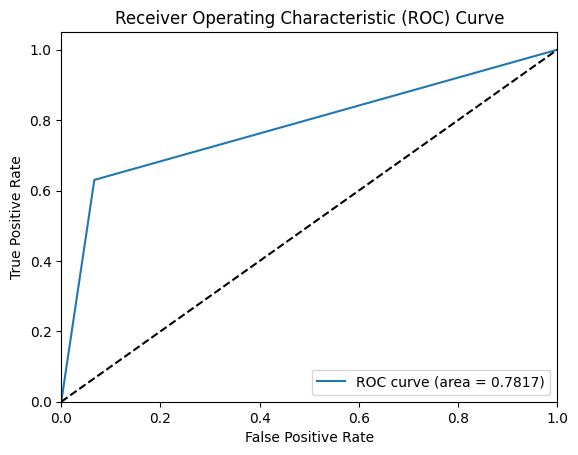

In [54]:
metrics_df = metrics_df.transpose()
fpr = metrics_df['False Positive Rate'].item()
tpr = metrics_df['True Positive Rate'].item()
auc = metrics_df['Area Under the Curve'].item()

plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Making prediction


In [55]:
testset = pd.read_csv("test.csv")
genderset = pd.read_csv("gender_submission.csv")

x_data = test_df[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare','Embarked']].to_numpy()
test_df['Survived'] = clf.predict(x_data)
final_df = test_df[['PassengerId', 'Survived']]
final_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [56]:
final_df.to_csv('output.csv', index=False)